In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_semestr_5_personal.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studium_id               726 non-null    int64  
 1   dokoncil_semestr         726 non-null    float64
 2   BI-PA1_znamka            726 non-null    float64
 3   BI-PA1_poradi_zapisu     726 non-null    float64
 4   BI-PA1_semestr           726 non-null    float64
 5   BI-PAI_znamka            726 non-null    float64
 6   BI-PAI_poradi_zapisu     726 non-null    float64
 7   BI-PAI_semestr           726 non-null    float64
 8   BI-CAO_znamka            726 non-null    float64
 9   BI-CAO_poradi_zapisu     726 non-null    float64
 10  BI-CAO_semestr           726 non-null    float64
 11  BI-PS1_znamka            726 non-null    float64
 12  BI-PS1_poradi_zapisu     726 non-null    float64
 13  BI-PS1_semestr           726 non-null    float64
 14  BI-MLO_znamka            7

In [4]:
matrix_bak.mean()

studium_id                 1.351615e+07
dokoncil_semestr           9.063361e-01
BI-PA1_znamka              2.003444e+00
BI-PA1_poradi_zapisu       1.041322e+00
BI-PA1_semestr             9.710744e-01
BI-PAI_znamka              2.179063e+00
BI-PAI_poradi_zapisu       9.641873e-01
BI-PAI_semestr             9.600551e-01
BI-CAO_znamka              1.064050e+00
BI-CAO_poradi_zapisu       9.393939e-01
BI-CAO_semestr             9.393939e-01
BI-PS1_znamka              2.181818e+00
BI-PS1_poradi_zapisu       1.090909e+00
BI-PS1_semestr             9.807163e-01
BI-MLO_znamka              1.829890e+00
BI-MLO_poradi_zapisu       9.958678e-01
BI-MLO_semestr             9.531680e-01
BI-ZMA_znamka              1.922176e+00
BI-ZMA_poradi_zapisu       1.026171e+00
BI-ZMA_semestr             9.669421e-01
pocet_kreditu_semestr_1    2.790496e+01
BI-PA2_znamka              2.078512e+00
BI-PA2_semestr             9.903581e-01
BI-PA2_poradi_zapisu       1.212121e+00
BI-DBS_znamka              1.710055e+00


## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak = matrix_bak.set_index(['studium_id'])

### Nastavení target proměnné na nominální

In [6]:
dokoncil_semestr_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
matrix_bak['dokoncil_semestr'] = matrix_bak['dokoncil_semestr'].astype(dokoncil_semestr_category)

In [7]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 12948006 to 17329006
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         726 non-null    category
 1   BI-PA1_znamka            726 non-null    float64 
 2   BI-PA1_poradi_zapisu     726 non-null    float64 
 3   BI-PA1_semestr           726 non-null    float64 
 4   BI-PAI_znamka            726 non-null    float64 
 5   BI-PAI_poradi_zapisu     726 non-null    float64 
 6   BI-PAI_semestr           726 non-null    float64 
 7   BI-CAO_znamka            726 non-null    float64 
 8   BI-CAO_poradi_zapisu     726 non-null    float64 
 9   BI-CAO_semestr           726 non-null    float64 
 10  BI-PS1_znamka            726 non-null    float64 
 11  BI-PS1_poradi_zapisu     726 non-null    float64 
 12  BI-PS1_semestr           726 non-null    float64 
 13  BI-MLO_znamka            726 non-null    float64 
 14

### Nastavení atributů na kategorické

In [8]:
# ordinální
attr_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
# pohlavi_kod
matrix_bak['pohlavi_kod'] = matrix_bak['pohlavi_kod'].astype(attr_category)
# je_cech
matrix_bak['je_cech'] = matrix_bak['je_cech'].astype(attr_category)
# gymnazium
matrix_bak['gymnazium'] = matrix_bak['gymnazium'].astype(attr_category)
# praha
matrix_bak['praha'] = matrix_bak['praha'].astype(attr_category)
# scio
matrix_bak['scio'] = matrix_bak['scio'].astype(attr_category)
# olym
matrix_bak['olym'] = matrix_bak['olym'].astype(attr_category)
# zkouska
matrix_bak['zkouska'] = matrix_bak['zkouska'].astype(attr_category)
# prominuti
matrix_bak['prominuti'] = matrix_bak['prominuti'].astype(attr_category)

In [9]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 12948006 to 17329006
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         726 non-null    category
 1   BI-PA1_znamka            726 non-null    float64 
 2   BI-PA1_poradi_zapisu     726 non-null    float64 
 3   BI-PA1_semestr           726 non-null    float64 
 4   BI-PAI_znamka            726 non-null    float64 
 5   BI-PAI_poradi_zapisu     726 non-null    float64 
 6   BI-PAI_semestr           726 non-null    float64 
 7   BI-CAO_znamka            726 non-null    float64 
 8   BI-CAO_poradi_zapisu     726 non-null    float64 
 9   BI-CAO_semestr           726 non-null    float64 
 10  BI-PS1_znamka            726 non-null    float64 
 11  BI-PS1_poradi_zapisu     726 non-null    float64 
 12  BI-PS1_semestr           726 non-null    float64 
 13  BI-MLO_znamka            726 non-null    float64 
 14

## Doplnění NaN hodnot

In [10]:
matrix_bak = matrix_bak.fillna(0)

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [11]:
Xdata = matrix_bak.drop(columns='dokoncil_semestr')
ydata = matrix_bak.dokoncil_semestr

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(726, 63)

(726,)

trénovací data


(580, 63)

(580,)

testovací data


(146, 63)

(146,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [13]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [14]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [15]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}

0.953798 (+/-0.018501) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.947976 (+/-0.031468) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.943190 (+/-0.041660) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.946278 (+/-0.032339) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.943190 (+/-0.041660) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.952564 (+/-0.014813) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.950410 (+/-0.026331) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.952978 (+/-0.018899) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.951953 (+/-0.015903) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.951953 (+/-0.015903) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [16]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.925862
accuracy score (test): 0.910959


In [17]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
54,datum_zahajeni,0.610975
51,pocet_kreditu_semestr_4,0.389025
0,BI-PA1_znamka,0.000000
46,BI-PSI_semestr,0.000000
34,BI-AAG_poradi_zapisu,0.000000
35,BI-ZDM_znamka,0.000000
36,BI-ZDM_semestr,0.000000
37,BI-ZDM_poradi_zapisu,0.000000
38,BI-AG1_znamka,0.000000
39,BI-AG1_semestr,0.000000


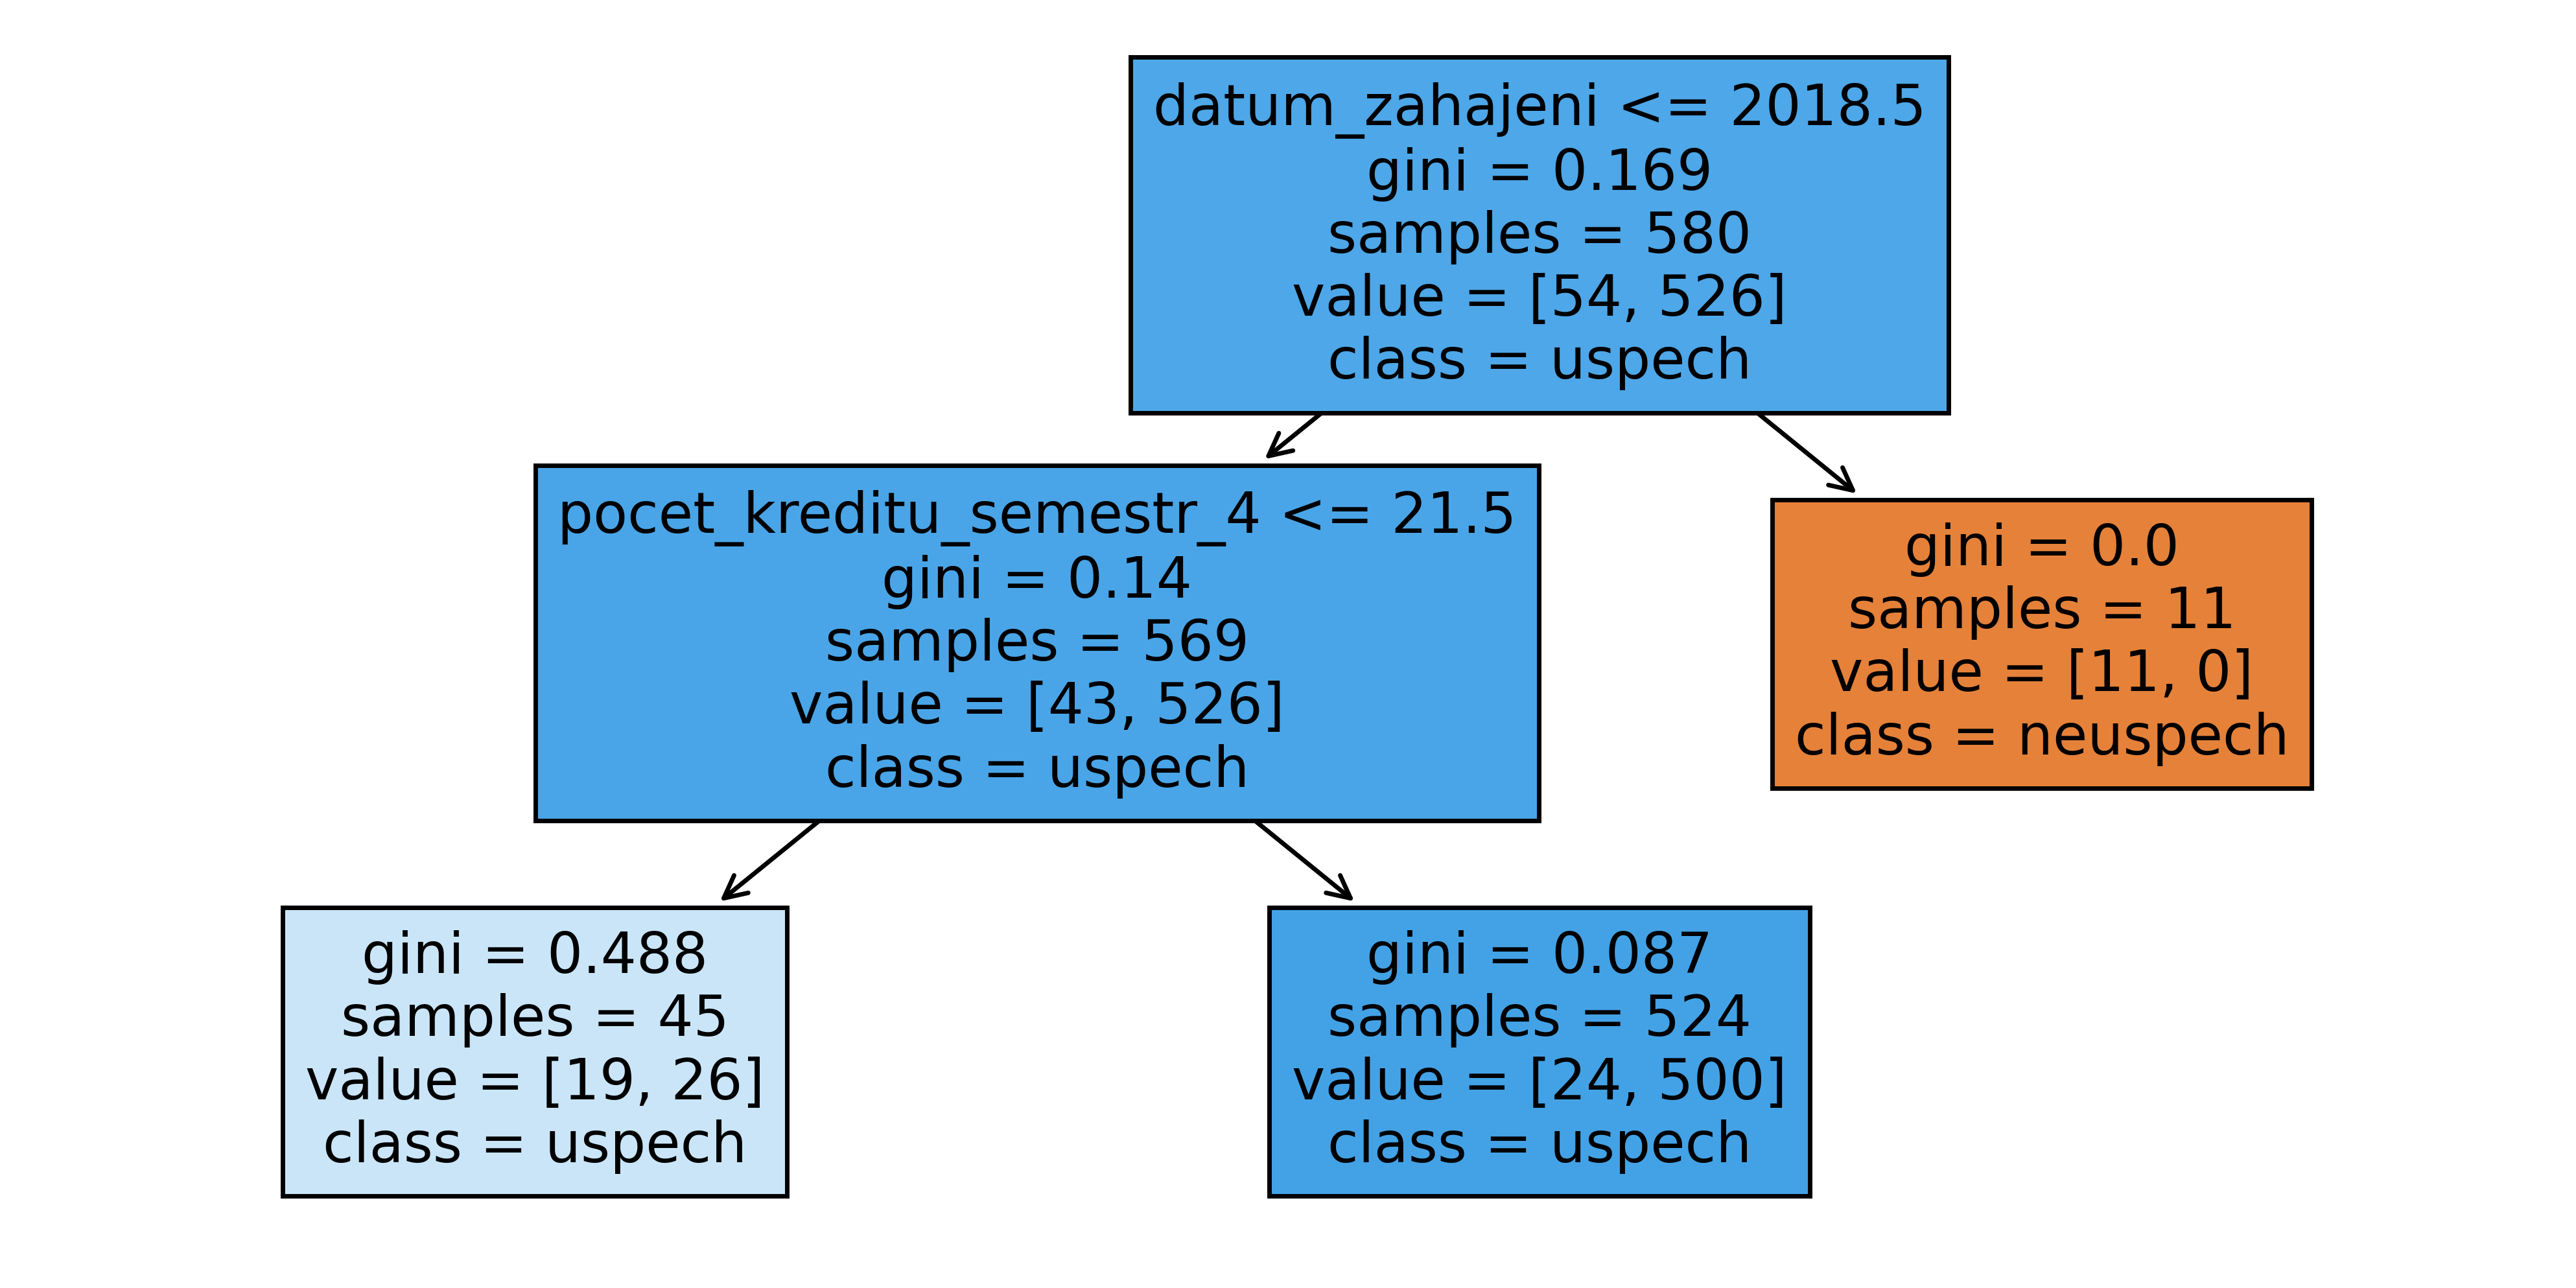

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1_semestr1.png')

#### Random forest

In [19]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [20]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 10}

0.952036 (+/-0.004440) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.950044 (+/-0.000445) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.949954 (+/-0.011560) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.950044 (+/-0.011560) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.949836 (+/-0.010562) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.950900 (+/-0.007090) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.950791 (+/-0.011210) for {'criterion': 'gini', 'max_depth': 2, 'max_

In [21]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.943103
accuracy score (test): 0.938356


In [22]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
51,pocet_kreditu_semestr_4,0.239543
28,BI-LIN_znamka,0.177875
30,BI-LIN_poradi_zapisu,0.111539
14,BI-MLO_semestr,0.076847
41,pocet_kreditu_semestr_3,0.075470
12,BI-MLO_znamka,0.054700
54,datum_zahajeni,0.054050
1,BI-PA1_poradi_zapisu,0.050793
19,BI-PA2_znamka,0.032396
13,BI-MLO_poradi_zapisu,0.031435


#### Adaboost

In [23]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [24]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.8, 'n_estimators': 40}

0.960738 (+/-0.004197) for {'learning_rate': 0.1, 'n_estimators': 5}
0.960738 (+/-0.004197) for {'learning_rate': 0.1, 'n_estimators': 10}
0.960738 (+/-0.004197) for {'learning_rate': 0.1, 'n_estimators': 15}
0.960738 (+/-0.004197) for {'learning_rate': 0.1, 'n_estimators': 20}
0.961618 (+/-0.004134) for {'learning_rate': 0.1, 'n_estimators': 25}
0.963385 (+/-0.005358) for {'learning_rate': 0.1, 'n_estimators': 30}
0.963327 (+/-0.009637) for {'learning_rate': 0.1, 'n_estimators': 35}
0.962303 (+/-0.014508) for {'learning_rate': 0.1, 'n_estimators': 40}
0.963199 (+/-0.016196) for {'learning_rate': 0.1, 'n_estimators': 45}
0.960738 (+/-0.004197) for {'learning_rate': 0.2, 'n_estimators': 5}
0.960738 (+/-0.004197) for {'learning_rate': 0.2, 'n_estimators': 10}
0.962506 (+/-0.006455) for {'learning_rate': 0.2, 'n_estimators': 15}
0.964164 (+/-0.014281) for {'learning_rate': 0.2, 'n_estimators': 20}
0.963209 (+/-0.01708

In [25]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.970690
accuracy score (test): 0.938356


In [26]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
51,pocet_kreditu_semestr_4,0.125
35,BI-ZDM_znamka,0.100
28,BI-LIN_znamka,0.100
41,pocet_kreditu_semestr_3,0.075
18,pocet_kreditu_semestr_1,0.075
31,pocet_kreditu_semestr_2,0.050
30,BI-LIN_poradi_zapisu,0.050
21,BI-PA2_poradi_zapisu,0.050
3,BI-PAI_znamka,0.050
48,BI-BEZ_znamka,0.050


#### Xgboost

In [27]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [28]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.1, 'max_depth': 5}

0.971240 (+/-0.018786) for {'eta': 0.1, 'max_depth': 3}
0.971325 (+/-0.018469) for {'eta': 0.1, 'max_depth': 4}
0.973040 (+/-0.012181) for {'eta': 0.1, 'max_depth': 5}
0.972014 (+/-0.016672) for {'eta': 0.1, 'max_depth': 6}
0.971910 (+/-0.019605) for {'eta': 0.1, 'max_depth': 7}
0.966502 (+/-0.029538) for {'eta': 0.2, 'max_depth': 3}
0.972100 (+/-0.015253) for {'eta': 0.2, 'max_depth': 4}
0.965441 (+/-0.019233) for {'eta': 0.2, 'max_depth': 5}
0.968240 (+/-0.021472) for {'eta': 0.2, 'max_depth': 6}
0.968055 (+/-0.023533) for {'eta': 0.2, 'max_depth': 7}
0.967466 (+/-0.024074) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.967545 (+/-0.023949) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.968353 (+/-0.017998) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.969143 (+/-0.019048) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.968300 (+/-0.017901) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.967519 (+/-0.024079)

In [29]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.998276
accuracy score XGBoost (val): 0.965753


In [30]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [31]:
feat_imp

pocet_kreditu_semestr_4    106.0
pocet_kreditu_semestr_3     82.0
BI-LIN_znamka               66.0
datum_zahajeni              61.0
maturita_nastup_rozdil      53.0
BI-ZDM_znamka               53.0
BI-AG1_znamka               50.0
BI-PA2_znamka               47.0
pocet_kreditu_semestr_2     43.0
BI-LIN_poradi_zapisu        41.0
BI-AAG_znamka               37.0
BI-BEZ_znamka               34.0
gymnazium                   30.0
BI-OSY_znamka               29.0
BI-PA2_poradi_zapisu        27.0
BI-PA1_znamka               24.0
pocet_kreditu_semestr_1     23.0
rok_maturity                22.0
BI-ZMA_znamka               22.0
BI-PSI_znamka               21.0
BI-PS1_znamka               19.0
BI-PAI_znamka               19.0
BI-DBS_znamka               13.0
praha                       10.0
je_cech                      8.0
BI-MLO_znamka                8.0
BI-CAO_znamka                8.0
BI-SAP_znamka                5.0
BI-PSI_semestr               3.0
BI-ZMA_poradi_zapisu         1.0
BI-PS1_por

#### MLP

In [32]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [33]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.906897
accuracy score mlp (val): 0.904110


#### Lineární regrese

In [34]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [35]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.2234575651018759
RMSE reg (test): 0.2572403527064078


#### kNN

In [36]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [37]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

0.951991 (+/-0.024364) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.951991 (+/-0.024364) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.941235 (+/-0.043292) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.941235 (+/-0.043292) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.937689 (+/-0.034378) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.951991 (+/-0.024364) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.925955 (+/-0.036284) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.941235 (+/-0.043292) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.952993 (+/-0.003742) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.952993 (+/-0.003742) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.944225 (+/-0.035188) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.944225 (+/-0.035188) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.94

In [38]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.927586
accuracy score knn (val): 0.924658


## Výsledky

In [39]:
results = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

### Měřeno accuracy_score

In [40]:
results.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

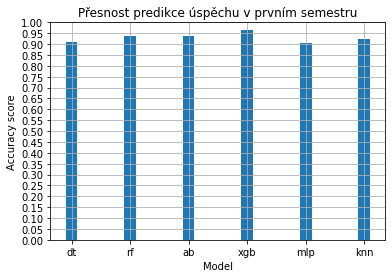

In [41]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results.index, results['vysledky'].values, width)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v prvním semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [42]:
results

,vysledky
dt,0.911
rf,0.938
ab,0.938
xgb,0.966
mlp,0.904
knn,0.925


### Měřeno f1_score

In [43]:
results_f1 = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

In [44]:
results_f1.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results_f1.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results_f1.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results_f1.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results_f1.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results_f1.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

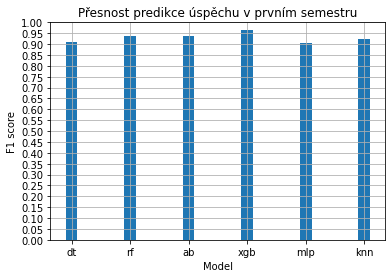

In [45]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results_f1.index, results_f1['vysledky'].values, width)

ax.set_ylabel('F1 score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v prvním semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [46]:
results_f1

,vysledky
dt,0.911
rf,0.938
ab,0.938
xgb,0.966
mlp,0.904
knn,0.925
